Loading...
Loading...
Loss: 0.5834
Loading...
Loss: 0.3628
Loading...
Loss: 0.1299
Loading...
Loss: 0.0114
Loading...
Loss: 0.0033
Epoch: 50, Loss: 0.0022
tensor(0.0100)
TEMP (1).jpg
  after attack guess: no tumor (0.892)
TEMP (10).jpg
  after attack guess: no tumor (0.788)
TEMP (11).jpg
  after attack guess: no tumor (0.999)
TEMP (12).jpg
  after attack guess: no tumor (0.999)
TEMP (13).jpg
  after attack guess: no tumor (0.898)
TEMP (14).jpg
  after attack guess: no tumor (0.995)
TEMP (15).jpg
  after attack guess: yes tumor (0.950)
TEMP (16).jpg
  after attack guess: no tumor (0.995)
TEMP (2).jpg
  after attack guess: yes tumor (1.000)
TEMP (3).jpg
  after attack guess: yes tumor (0.991)
TEMP (4).jpg
  after attack guess: no tumor (0.966)
TEMP (5).jpg
  after attack guess: no tumor (0.723)
TEMP (6).jpg
  after attack guess: yes tumor (0.558)
TEMP (7).jpg
  after attack guess: yes tumor (0.998)
TEMP (8).jpg
  after attack guess: yes tumor (0.971)
TEMP (9).jpg
  after attack guess: no

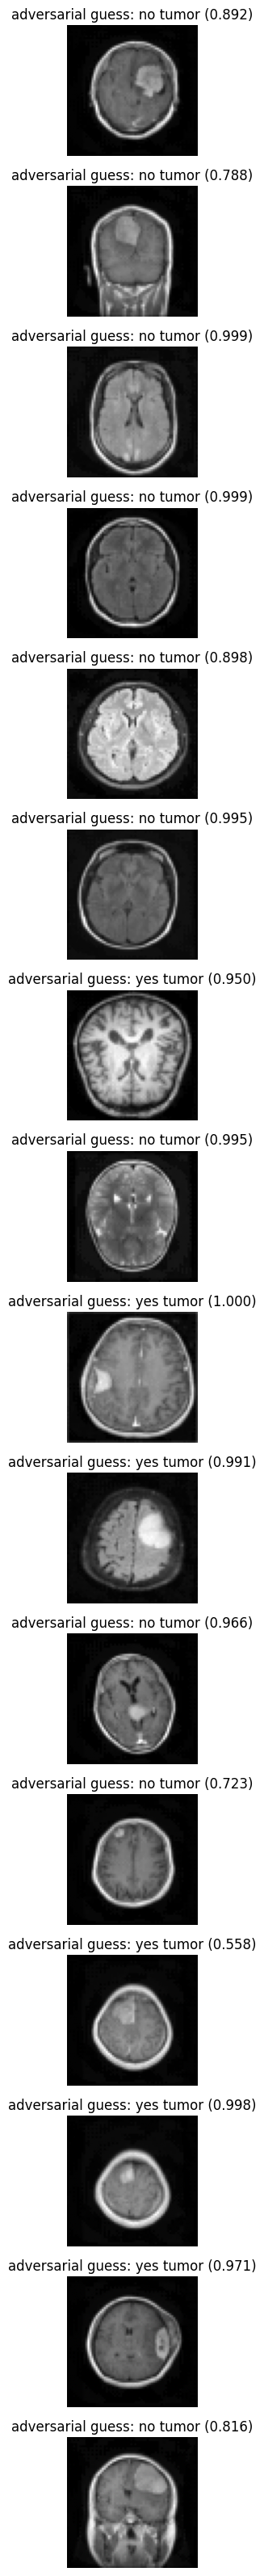

In [1]:
from model_training import model, dataset_classes
from imports import *
from attacks import gen_attack
from torchvision.utils import save_image

def main_attack():
    model.eval()
    image_scale = (64, 64)
    
    transform = transforms.Compose([
        transforms.Grayscale(), 
        transforms.Resize(image_scale), 
        transforms.ToTensor()
    ])
    
    fp = r"C:\Users\bjon6\Documents\src\Temp Testing Data"
    adv_images = [f for f in os.listdir(fp) if f.lower().endswith(('.jpg', '.jpeg', '.png'))] #filling adv_images with the unlabeled images 
    dataset_classes = ['no', 'yes']
    
    # showing all the images in the folder 
    num_images = len(adv_images)
    plt.figure(figsize=(12, num_images * 2))
    
    i = 1
    for idx, img_name in enumerate(adv_images):
        img_path = os.path.join(fp, img_name)
        img = Image.open(img_path)
        input_tensor = transform(img).unsqueeze(0)
        
        # doing the attack
        attack = gen_attack(model)
        adv_tensor = attack(input_tensor)
        if (i == 1):
            diff = (adv_tensor - input_tensor).abs().max()
            print(diff)
            
        # adversarial guess
        with torch.no_grad():
            adv_out = model(adv_tensor)
            adv_probs = torch.softmax(adv_out, dim=1)[0]
            _, adv_pred = torch.max(adv_out, 1)
        i += 1
        adv_pred_label = dataset_classes[adv_pred.item()]
        adv_confidence = adv_probs[adv_pred.item()].item()

        #UnComment these (2 lines) out below to see predicted output (it was commented for testing)
        #print(f"{img_name}")
        #print(f"  after attack guess: {adv_pred_label} tumor ({adv_confidence:.3f})")
    
        #saving the adv_images for better training  
        #save_path = f"C:\\Users\\bjon6\\Documents\\src\\Temp Adv Images for Testing\\img_{idx}.png"
        #save_image(adv_tensor, save_path)
        
        #plotting the attacked images 
        plt.subplot(num_images, 2, idx * 2 + 2)
        adv_img = adv_tensor.squeeze().detach().cpu().numpy()
        plt.imshow(adv_img, cmap='gray')
        plt.title(f"adversarial guess: {adv_pred_label} tumor ({adv_confidence:.3f})")
        plt.axis("off")
        
    #plt.tight_layout() UnComment this out so that it shows images this was commented for testing 
    #plt.show()

main_attack()